[Source 1](https://www.geeksforgeeks.org/contingency-table-in-python/)

[Source 2](https://www.statology.org/contingency-table-python/)

Our HELLO WORD example

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
x = np.array([[1, 0],
              [1, 0],
              [0, 1],
              [0, 1],
              [1, 1],
              [1, 1],
              [0, 0],
              [0, 1]])
b = np.array([0, 1, 0, 1, 0, 1, 0, 0])
# b is a line precursor of y. We transpose it. 
y = b.reshape(-1,1)

In [ ]:
# trandform arrays to dataframe
df1 = pd.DataFrame(x, columns = ['X1', 'X2'])
df2 = pd.DataFrame(y, columns = ['Y'])
df1

,X1,X2
0,1,0
1,1,0
2,0,1
3,0,1
4,1,1
5,1,1
6,0,0
7,0,1


In [ ]:
df2

,Y
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,0


In [ ]:
# merge dataframe x and y
df1['Y'] = df2

In [ ]:
df1

,X1,X2,Y
0,1,0,0
1,1,0,1
2,0,1,0
3,0,1,1
4,1,1,0
5,1,1,1
6,0,0,0
7,0,1,0


In [ ]:
# unique line counter for dataframe
dz = df1.groupby(['X1', 'X2', 'Y']).size().reset_index(name='Count')
# Without reset index, something strange is happening
dz

,X1,X2,Y,Count
0,0,0,0,1
1,0,1,0,2
2,0,1,1,1
3,1,0,0,1
4,1,0,1,1
5,1,1,0,1
6,1,1,1,1


In [ ]:
# basic table
pd.crosstab(index=df1['Y'], columns=df1['X2'])

X2,0,1
Y,,
0,2,3
1,1,2


In [ ]:
# Contingency Table with margins
pd.crosstab(index=df1['Y'], columns=df1['X1'], margins=True)

X1,0,1,All
Y,,,
0,3,2,5
1,1,2,3
All,4,4,8


In [ ]:
# Contingency Table with margins and normalize all
pd.crosstab(index=df1['Y'], columns=df1['X1'],normalize="all", margins=True)

X1,0,1,All
Y,,,
0,0.375,0.25,0.625
1,0.125,0.25,0.375
All,0.500,0.50,1.000


In [ ]:
# Contingency Table with margins and normalize by index
pd.crosstab(index=df1['Y'], columns=df1['X1'],normalize="index", margins=True)

X1,0,1
Y,,
0,0.600000,0.400000
1,0.333333,0.666667
All,0.500000,0.500000


In [ ]:
# Contingency Table with margins and normalize by column
pd.crosstab(index=df1['Y'], columns=df1['X1'],normalize="columns", margins=True)

X1,0,1,All
Y,,,
0,0.75,0.5,0.625
1,0.25,0.5,0.375


In [ ]:
# Contingency Table with margins and all colums in dataframe
pd.crosstab(index=df1['Y'], columns=[df1['X1'], df1['X2']], margins=True)

X1   0     1    All
X2   0  1  0  1    
Y                  
0    1  2  1  1   5
1    0  1  1  1   3
All  1  3  2  2   8

In [ ]:
from sympy import *
from fractions import Fraction

print(Fraction(5, 6))

5/6


In [ ]:
test = pd.crosstab(index=df1['Y'], columns=df1['X1'], margins=True)
test

X1,0,1,All
Y,,,
0,3,2,5
1,1,2,3
All,4,4,8


In [ ]:
test.applymap(lambda x: Fraction(x, 5))

X1,0,1,All
Y,,,
0,3/5,2/5,1
1,1/5,2/5,3/5
All,4/5,4/5,8/5


In [ ]:
def crosstab_to_fraction(test:pd.DataFrame) -> pd.DataFrame:
    # convert crosstab result to numpy
    data_top = list(test.columns) 
    input_data = test.to_numpy()
    # select subarray
    lines, rows = input_data.shape
    subarray = input_data[:(lines-1),:rows-1]
    # define fraction denominator
    denom = input_data[:,-1:]
    denom = denom[:-1]
    # save all digit as a fraction
    input_data = input_data.astype('object')

    for i in range(0, len(subarray)):
        for j in range(0, len(subarray[i])):
            input_data[i,j] = Fraction(subarray[i,j], denom[i][0])

    # convert numpy to dataframe
    df = pd.DataFrame(input_data, columns=data_top)
    return df
    
res = crosstab_to_fraction(test)
res

,0,1,All
0,3/5,2/5,5
1,1/3,2/3,3
2,4,4,8


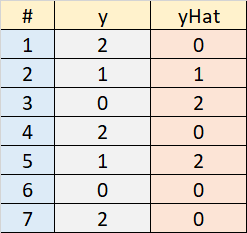

In [ ]:
from itertools import product

x = np.array([[2, 0],
              [1, 1],
              [0, 2],
              [2, 0],
              [1, 2],
              [0, 0],
              [2, 0]])


def unique_counter(test:pd.DataFrame) -> pd.DataFrame:
    # unique line counter for dataframe
    dz = test.groupby(list(test.columns)).size().reset_index(name='Count')
    return dz


def expand_array(test:np.array) -> np.array:
    # get unique element
    rows, cols = test.shape
    test = np.reshape(test, (cols, rows))
    # calculate product of colums in array
    lines = product(test[0], test[1])
    exploist = np.array(list(set(lines)))
    return exploist

def set_diff2d(A, B):
    """
    from here https://cloudstack.ninja/msunij/hot-to-get-the-set-difference-of-two-2d-numpy-arrays-or-equivalent-of-np-setdiff1d-in-a-2d-array/
    """
    nrows, ncols = A.shape
    dtype={'names':['f{}'.format(i) for i in range(ncols)],
        'formats':ncols * [A.dtype]}
    C = np.setdiff1d(A.view(dtype), B.view(dtype))

    return C.view(A.dtype).reshape(-1, ncols)

print("Original data")
print(x)
print("==================================")
print("Data after expansion ")
data = expand_array(x)
print(data)
print("==================================")
print("Difference between original and expansion")
news = set_diff2d(data, x)
print(news)
print("==================================")


# calculate unique counter of ofiginal data
df1 = pd.DataFrame(x, columns = ['y', 'yHat'])
newdf = unique_counter(df1)

# calculate data to append
adddf = pd.DataFrame(news, columns = ['y', 'yHat'])
adddf['Count'] = 0

frames = [newdf, adddf]
result = pd.concat(frames)
result.reset_index(drop=True, inplace=True)

print("Original data with extension and counting")
result

Original data
[[2 0]
 [1 1]
 [0 2]
 [2 0]
 [1 2]
 [0 0]
 [2 0]]
Data after expansion 
[[0 1]
 [1 2]
 [0 0]
 [2 1]
 [2 0]
 [1 1]
 [2 2]
 [1 0]
 [0 2]]
Difference between original and expansion
[[0 1]
 [1 0]
 [2 1]
 [2 2]]
Original data with extension and counting


,y,yHat,Count
0,0,0,1
1,0,2,1
2,1,1,1
3,1,2,1
4,2,0,3
5,0,1,0
6,1,0,0
7,2,1,0
8,2,2,0


In [ ]:
x = np.array([[2, 0],
              [1, 1],
              [0, 2],
              [2, 0],
              [1, 2],
              [0, 0],
              [2, 0]])
x.sort(axis=0)
x

array([[0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [2, 1],
       [2, 2],
       [2, 2]])

In [ ]:
x = np.array([[2, 0],
              [1, 1],
              [0, 2],
              [2, 0],
              [1, 2],
              [0, 0],
              [2, 0]])
fliprX = np.fliplr(x)
fliprX

array([[0, 2],
       [1, 1],
       [2, 0],
       [0, 2],
       [2, 1],
       [0, 0],
       [0, 2]])

In [ ]:
fliprX.T

array([[0, 1, 2, 0, 2, 0, 0],
       [2, 1, 0, 2, 1, 0, 2]])

In [ ]:
np.lexsort(fliprX.T)

array([5, 2, 1, 4, 0, 3, 6])

In [ ]:

print(x[np.lexsort(fliprX.T)], "\nx =\n", x)
# x[np.lexsort(np.fliplr(x).T)]
# x

[[0 0]
 [0 2]
 [1 1]
 [1 2]
 [2 0]
 [2 0]
 [2 0]] 
x =
 [[2 0]
 [1 1]
 [0 2]
 [2 0]
 [1 2]
 [0 0]
 [2 0]]
